In [14]:
import sys
import os
XCr_path = os.getcwd()
sys.path.append(XCr_path)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from XCrystal import *
import time

In [15]:
Npoints = 18
delta_theta = np.linspace(-13.862472049580001e-6, 41.54780686945001e-6, Npoints)  
omega0 = 9000.0
Rs = np.zeros(Npoints)
Ts = np.zeros(Npoints)

In [16]:
def single_realization(delta_theta, omega):
    
    xcr = XCrystal(XCr_path+'/Crystal.yaml', omega)
    xcr.configure(delta_theta)
    xcr.run3D()
    
    return xcr.Reflectivity, xcr.Transmission

In [17]:
for i in range(0, Npoints):
    Rs[i], Ts[i] = single_realization(delta_theta[i], omega0)

Delta theta:  -1.3862472049580001e-05 ; Reflectivity:  0.010145502810567425 ; Transmission:  0.42257344237779
Delta theta:  -1.0603043877872354e-05 ; Reflectivity:  0.025246815952634203 ; Transmission:  0.4262915529349036
Delta theta:  -7.343615706164705e-06 ; Reflectivity:  0.05440729011535366 ; Transmission:  0.4255199995531218
Delta theta:  -4.084187534457056e-06 ; Reflectivity:  0.08033020784051412 ; Transmission:  0.42815360134040403
Delta theta:  -8.247593627494089e-07 ; Reflectivity:  0.04536589537656349 ; Transmission:  0.46441248693521847
Delta theta:  2.4346688089582383e-06 ; Reflectivity:  0.17032779016867713 ; Transmission:  0.42910377227684493
Delta theta:  5.694096980665889e-06 ; Reflectivity:  0.4351830962261133 ; Transmission:  0.2949711814942751
Delta theta:  8.953525152373536e-06 ; Reflectivity:  0.9633643363231325 ; Transmission:  7.301302542303529e-06
Delta theta:  1.2212953324081183e-05 ; Reflectivity:  0.9410960394292037 ; Transmission:  3.6282267625870893e-06
Del

In [18]:
matplotlib.rcParams['figure.figsize'] = (12,8)
matplotlib.rcParams['axes.labelsize'] = 20
matplotlib.rcParams['xtick.labelsize'] = 20
matplotlib.rcParams['ytick.labelsize'] = 20
matplotlib.rcParams['legend.fontsize'] = 20

In [19]:
XOPfile = 'Si4009keVThickness50um'
XOPdata = np.loadtxt(XOPfile)

Text(0, 0.5, 'R')

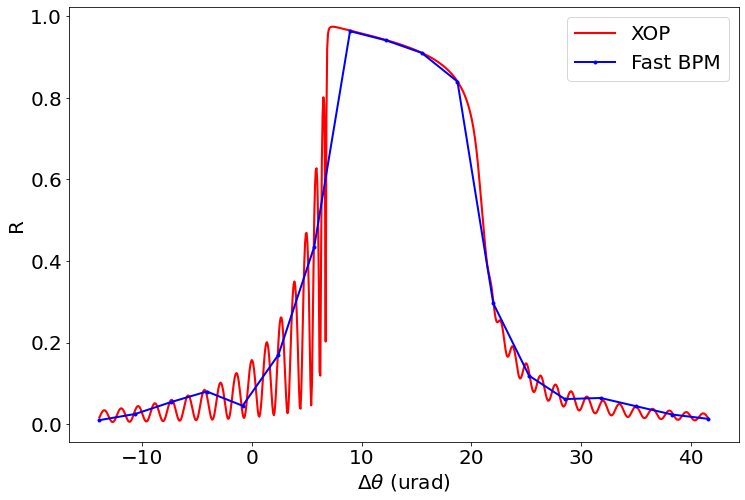

In [20]:
plt.plot(XOPdata[:,0]*4.848137, XOPdata[:,1], '-', linewidth=2.1, color='red', label='XOP')
plt.plot(1e6 * delta_theta, Rs, '.-', linewidth=2.0, color='blue', label='Fast BPM')


plt.legend()
plt.xlabel(r'$\Delta \theta$ (urad)')
plt.ylabel('R')